DATA SOURCE: https://data.world/

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [195]:
df = pd.read_csv ('game-of-thones-deaths.csv')
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           2224 non-null   object
 1   Allegiance     2224 non-null   object
 2   Death No.      2224 non-null   int64 
 3   Killer         2224 non-null   object
 4   Killers House  2224 non-null   object
 5   Location       2224 non-null   object
 6   Method         2224 non-null   object
 7   Season         2224 non-null   int64 
 8   Episode        2224 non-null   int64 
 9   Release date   2224 non-null   object
dtypes: int64(3), object(7)
memory usage: 173.9+ KB
None


In [181]:
# transform release date
df['Release date']= pd.to_datetime(df['Release date'])

In [196]:
# Drop the 'Location' column
df.drop('Location', axis=1, inplace=True)

In [170]:
# grouping by season, counting the number of deaths in each season

deaths_per_season = df.groupby ('Season')['Death No.'].count().reset_index()
print (deaths_per_season)

   Season  Death No.
0       1         58
1       2        130
2       3         86
3       4        170
4       5        158
5       6        396
6       7        334
7       8        892


In [66]:
#  Grouping data by seasons and episodes, counting the number of deaths in each episode

deaths_per_episode = df.groupby(['Season', 'Episode']).size().reset_index(name='Death Count')
print (deaths_per_episode)

    Season  Episode  Death Count
0        1        1            7
1        1        2            3
2        1        4            1
3        1        5           17
4        1        6            5
..     ...      ...          ...
64       8        2            1
65       8        3           35
66       8        4            5
67       8        5          844
68       8        6            1

[69 rows x 3 columns]


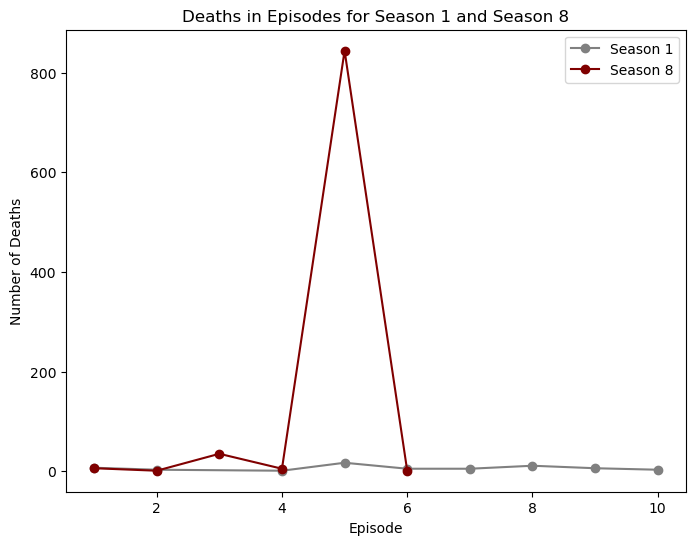

In [185]:
#Comparing first and last seasons by Death Count

# Filtering data for Season 1 and Season 8
season_1 = deaths_per_episode[deaths_per_episode['Season'] ==1]
season_8 = deaths_per_episode[deaths_per_episode['Season'] ==8]

# Creating a line plot for deaths in Season 1
plt.figure(figsize=(8, 6))
plt.plot(season_1['Episode'], season_1['Death Count'], marker='o', linestyle='-', color='grey', label='Season 1')
plt.plot(season_8['Episode'], season_8['Death Count'], marker='o', linestyle='-', color='maroon', label='Season 8')

plt.xlabel('Episode')
plt.ylabel('Number of Deaths')
plt.title('Deaths in Episodes for Season 1 and Season 8')
plt.legend()
plt.show()

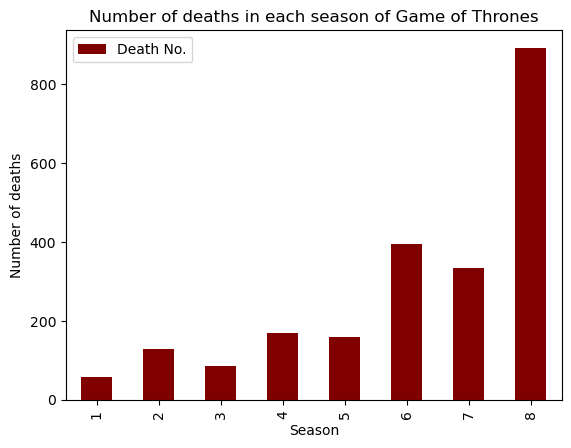

In [186]:
# Creating bar plot number of deaths by season

deaths_per_season.plot ('Season', 'Death No.', color='maroon', kind = 'bar')
plt.xlabel("Season")
plt.ylabel("Number of deaths")
plt.title("Number of deaths in each season of Game of Thrones")
 
plt.show ()

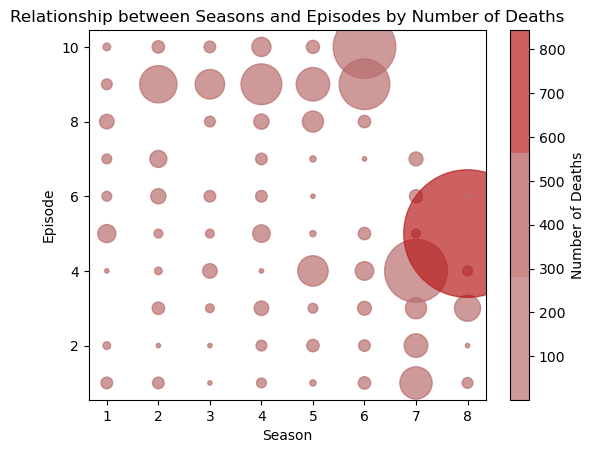

In [190]:
# Creating a custom colormap for the color bar
custom_colors = ['#b86e6e', '#b85656', '#b81c1c'] 
custom_cmap = ListedColormap(custom_colors)


plt.scatter(x = deaths_per_episode['Season'], y = deaths_per_episode['Episode'],s=deaths_per_episode['Death Count']*10, c=deaths_per_episode['Death Count'], cmap=custom_cmap, alpha=0.7)
          
plt.colorbar(label='Number of Deaths', cmap=custom_cmap) 
plt.xlabel('Season')
plt.ylabel('Episode')
plt.title('Relationship between Seasons and Episodes by Number of Deaths')

plt.show()

In [191]:
# Find top10 killers 

total_deaths = len(df)

# Grouping and counting the number of deaths caused by each killer
killers_count = df.groupby('Killer').size().reset_index(name='Kill Count')

# Sorting the killers 
top_10_killers = killers_count.sort_values(by='Kill Count', ascending=False)

# Calculating percentage proportion for each killer's kills
top_10_killers['Percentage'] = round ((top_killers['Kill Count'] / total_deaths) * 100, 2)


print ("Total deaths:", total_deaths)
print("Top 10 Killers:")
print(top_10_killers.head(10))

Total deaths: 2224
Top 10 Killers:
                      Killer  Kill Count  Percentage
20        Daenerys Targaryen        1008       45.32
17          Cersei Lannister         199        8.95
5                 Arya Stark          68        3.06
122                    Wight          54        2.43
46                  Jon Snow          51        2.29
13            Bolton soldier          47        2.11
69     Night's Watch brother          41        1.84
99   Sons of the Harpy agent          38        1.71
102            Stark Soldier          38        1.71
36                 Grey Worm          34        1.53


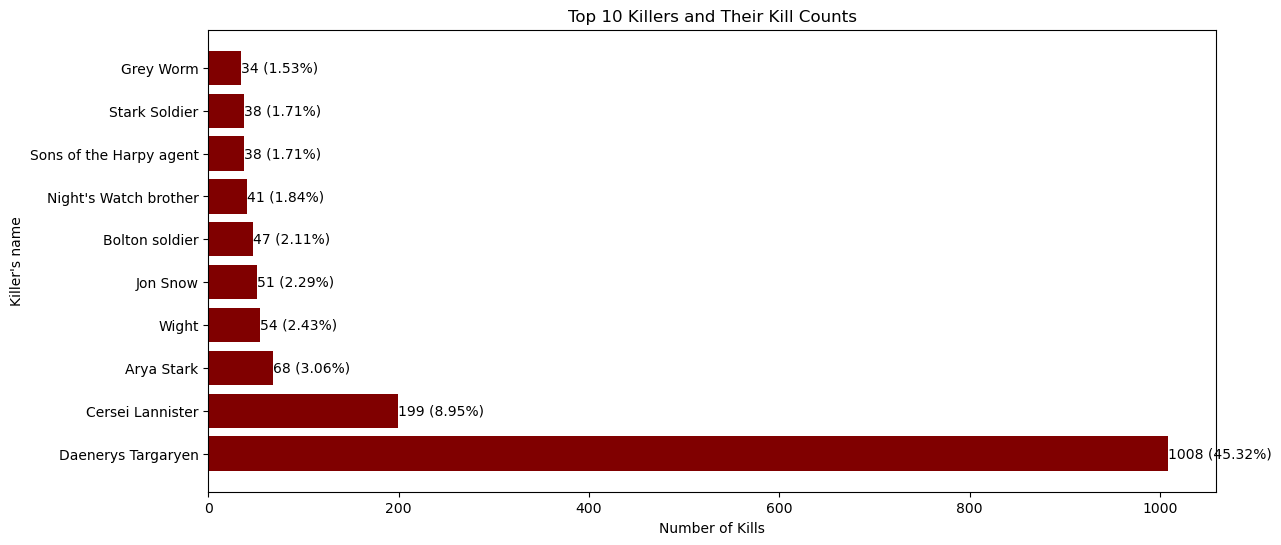

In [167]:
# Create a horizontal bar plot for the top 10 killers

plt.figure(figsize=(13, 6))
bars = plt.barh(top_10_killers['Killer'][:10], top_10_killers['Kill Count'][:10], color='maroon')

plt.xlabel('Number of Kills')
plt.ylabel("Killer's name")
plt.title('Top 10 Killers and Their Kill Counts')


# Displaying values on the bars (kill count and percentage)
plt.bar_label(bars, labels=top_10_killers['Kill Count'][:10].astype(str) + ' (' + top_10_killers['Percentage'][:10].astype(str) + '%)') 
            

plt.show()


In [192]:
# Finding who the top_killer's victims were

top_killer = top_10_killers.iloc[0]['Killer']
victims_of_top_killer = df[df['Killer'] == top_killer]
victim_allegiance_counts = victims_of_top_killer['Allegiance'].value_counts()

print (victim_allegiance_counts)

House Lannister      725
None                 229
Sons of the Harpy     18
Dothraki              16
The Masters           12
House Targaryen        2
House Greyjoy          2
Warlocks of Qarth      1
The Thirteen           1
Good Masters           1
Smallfolk              1
Name: Allegiance, dtype: int64


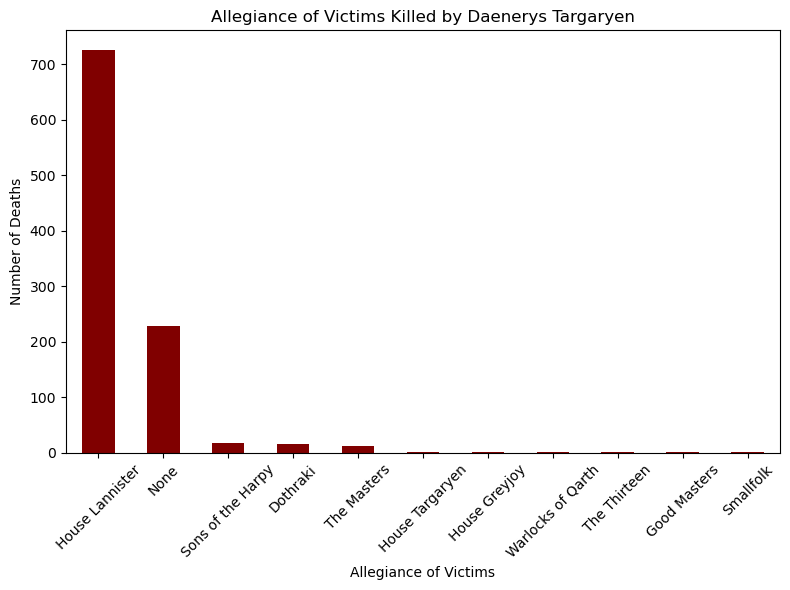

In [166]:
# Plot the allegiance of victims killed by the top killer
plt.figure(figsize=(8, 6))
victim_allegiance_counts.plot(kind='bar', color='maroon')
plt.xlabel('Allegiance of Victims')
plt.ylabel('Number of Deaths')
plt.title(f'Allegiance of Victims Killed by {top_killer}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [193]:
# Finding top killer's preferred killing methods 

method_counts = victims_of_top_killer['Method'].value_counts()

print (method_counts)

Dragonfire (Dragon)    983
Fire                    16
Sealed into vault        2
Claws (Dragon)           2
Teeth (Dragon)           2
Rubble                   2
Pillow                   1
Name: Method, dtype: int64


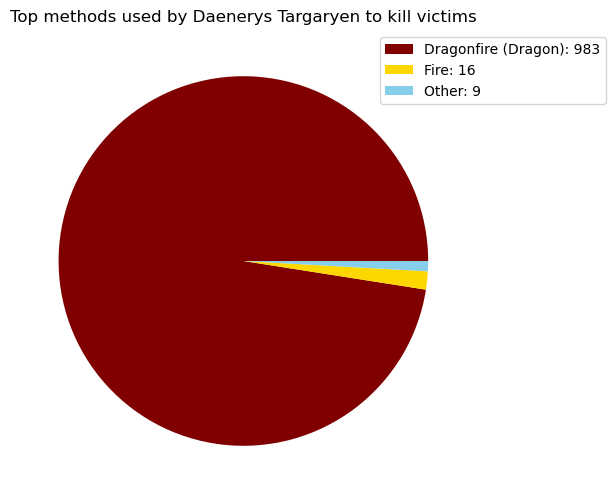

In [165]:
# create a pie chart of preferred killing methods

top_methods = method_counts.head(2)
other_methods = method_counts[2:].sum() 
top_methods['Other'] = other_methods

colors = ['maroon', 'gold', 'skyblue']

plt.figure(figsize=(6,6,))
plt.pie(top_methods, colors=colors)

plt.title(f'Top methods used by {top_killer} to kill victims')
plt.legend(labels=[f'{method}: {count}' for method, count in top_methods.items()], bbox_to_anchor=(1.3, 1))
plt.show ()


In [ ]:
plt.figure (figsize= (8,6))
method_counts.plot (kind = 'bar', color='skyblue')
plt.show()